<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo_hpo_with_artifact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 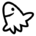 deepdriver hpo quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.19.6 which is incompatible.


In [16]:
pip install deepdriver==0.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement deepdriver==0.7.1 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.0.9, 0.0.10, 0.0.11, 0.0.12, 0.0.13, 0.0.14, 0.0.15, 0.0.16, 0.0.17, 0.0.18, 0.0.19, 0.0.20, 0.0.21, 0.0.22, 0.0.23, 0.0.24, 0.0.25, 0.0.26, 0.0.27, 0.0.28, 0.0.29, 0.0.30, 0.0.31, 0.0.32, 0.0.33, 0.0.34, 0.0.35, 0.0.36, 0.0.37, 0.0.38, 0.0.39, 0.0.40, 0.0.42, 0.0.43, 0.0.44, 0.0.45, 0.0.46, 0.0.47, 0.0.48, 0.0.49, 0.0.50, 0.0.51, 0.0.52, 0.0.53, 0.0.54, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.5, 0.3.6, 0.3.10, 0.3.11, 0.3.12, 0.3.13, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.5.0, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.5.5, 0.5.6, 0.6.0, 0.7.0)
ERROR: No matching distribution found for deepdriver==0.7.1


In [3]:
pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.58.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is inco

#1. ➕ import deepdriver & deeplearnig framework



In [4]:
import tensorflow as tf

In [17]:
import deepdriver

#2. ⚙ deepdriver server setting

In [18]:
deepdriver.setting(http_host="54.180.86.146:9011" ,grpc_host="54.180.86.146:19051")

#3. 🔌 log in to deepdriver

In [19]:
deepdriver.login(key="ZmIyNWQxNGJkMzUxYTVjODQ2NjM5NTgzOTM0YTM2OGE2ZmJiY2M2MWMwOWQ0OWFkNjU2YzNkM2UxMjA0YTVkZg==")

True

#4. ⌨ upload data & code

In [8]:
!wget --no-check-certificate https://raw.githubusercontent.com/molabokchi/bokchi_open_lab/main/main.py -O main.py

--2023-01-26 07:11:42--  https://raw.githubusercontent.com/molabokchi/bokchi_open_lab/main/main.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/plain]
Saving to: ‘main.py’

main.py             100%[===================>]   3.56K  --.-KB/s    in 0s      

2023-01-26 07:11:42 (56.7 MB/s) - ‘main.py’ saved [3642/3642]



In [9]:
deepdriver.init(exp_name="upload_data_code")

DeepDriver initialized
Team Name=molamola.python
Exp Name=upload_data_code
Run Name=run-10
Run URL=http://54.180.86.146:9111/experi/molamola.python/upload_data_code/run-10/run/chart


In [10]:
deepdriver.upload_code(name="cnn_1",type="CODE",path="./")

artifact is got! 
 artifact id :{486}
Uploading: [./main.py] |██████████████████████████████| [100.0%] [2/2]

In [11]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-01-26 04:24:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.8MB/s    in 3.8s    

2023-01-26 04:24:51 (17.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [ ]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)

In [ ]:
arti =deepdriver.Artifacts(name="cat_dog",type="DATASET")

In [ ]:
arti.add("./cat_dog")

In [ ]:
deepdriver.upload_artifact(arti)

Uploading: [./cat_dog/test_set/dog/dog.920.jpg] |██████████████████████████████| [100.0%] [1900/1900]

True

#5. 🥼 create hpo

In [20]:
experiment_name="cat_dog_cnn_hpo_with_artifact_exp"

In [21]:
hpo_configuration = {
    "metric": {"name": "accuracy", "goal": "maximize"},
    "method": "grid",
    "parameters": {
        "batch_size": {
            "values": [32,64,128]
        },
        "learning_rate": {
            "values": [10e-2,10e-3,10e-4,10e-5]
        },
        "hidden_layer":{
            "values": [32,64,128]
        },
        "epoch" :{
            "values": [10]
        }

    }
}

In [22]:
# experiment init & config hyperparam
deepdriver.create_hpo(exp_name= experiment_name,hpo_config= hpo_configuration)

HPO initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_with_artifact_exp
Exp Url=/experi/molamola.python/cat_dog_cnn_hpo_with_artifact_exp/exp/chart
optuna study aleady exist !


('success', 550)

#5. 📚 train your code and send log

make model

In [23]:
artifact={ 
    "code" :
    { 
        "type" : "CODE", 
        "name" : "cnn_1", 
        "file": "main.py", 
        "fun": "train"
   }
}


In [24]:
 deepdriver.run_hpo(exp_name=experiment_name, artifact= artifact, count=10)

artifact is created!
DeepDriver initialized
Team Name=molamola.python
Exp Name=cat_dog_cnn_hpo_with_artifact_exp
Run Name=run-2
Run URL=http://54.180.86.146:9111/experi/molamola.python/cat_dog_cnn_hpo_with_artifact_exp/run-2/run/chart


[W 2023-01-26 07:41:22,743] Trial 1 failed with parameters: {'batch_size': 128, 'learning_rate': 0.1, 'hidden_layer': 128, 'epoch': 10} because of the following error: TypeError("'NoneType' object is not callable").
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.8/dist-packages/deepdriver/sdk/experiment.py", line 209, in <lambda>
    return lambda trial: objective(trial, exp_name, team_name, func, config)
  File "/usr/local/lib/python3.8/dist-packages/deepdriver/sdk/experiment.py", line 214, in objective
    y = func()
TypeError: 'NoneType' object is not callable
[W 2023-01-26 07:41:22,745] Trial 1 failed with value None.


'NoneType' object is not callable
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/deepdriver/sdk/experiment.py", line 254, in run_optimize
    study = study.optimize(get_wrapped_func(exp_name, team_name_, func, config), n_trials=count)
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/study.py", line 425, in optimize
    _optimize(
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 66, in _optimize
    _optimize_sequential(
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 163, in _optimize_sequential
    frozen_trial = _run_trial(study, func, catch)
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 251, in _run_trial
    raise func_err
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.8/dist-packages/deepdriver/sdk/experiment.py", line 209, i

True